In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.patches as mpatches
import matplotlib
import warnings

warnings.simplefilter(action = 'ignore', category = FutureWarning)

plt.rcParams.update({'axes.facecolor' : '#f7ead4'}) 

palette_pastel1 = sns.color_palette('Pastel1')

In [2]:
# import dataframe
df = pd.read_csv('deaths_on_eight-thousanders.csv')

In [3]:
df.head(5)

,Date,Name,Nationality,Cause of death,Mountain
0,2023-07-27,Muhammad Hassan,Pakistan,Unknown,K2
1,2022-07-22,Matthew Eakin,Australia,Fall,K2
2,2022-07-22,Richard Cartier,Canada,Fall,K2
3,2022-07-21,Ali Akbar Sakhi,Afghanistan,"Unknown, suspected altitude sickness",K2
4,2021-07-25,Rick Allen,United Kingdom,Avalanche,K2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078 entries, 0 to 1077
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            1078 non-null   object
 1   Name            1078 non-null   object
 2   Nationality     1076 non-null   object
 3   Cause of death  1069 non-null   object
 4   Mountain        1078 non-null   object
dtypes: object(5)
memory usage: 42.2+ KB


In [5]:
# check for null values
df.isnull().sum()

Date              0
Name              0
Nationality       2
Cause of death    9
Mountain          0
dtype: int64

In [6]:
# replace column names
df.columns = ['Date', 'Name', 'Nationality', 'Cause', 'Mountain']

In [7]:
# check for main causes of death
df['Cause'].value_counts()

Cause
Avalanche                                                                   276
Fall                                                                        205
Altitude sickness                                                            60
Exposure                                                                     35
Disappeared                                                                  35
                                                                           ... 
Hit by falling seracs, died in hospital                                       1
Probably altitude sickness                                                    1
Rescue helicopter crash                                                       1
Probably fall                                                                 1
Suffered from HAPE, later died in hospital due to cardiopulmonary arrest      1
Name: count, Length: 181, dtype: int64

In [8]:
# na's can be considered as unknown cases of death
df['Cause'] = df['Cause'].fillna('Unknown')

In [9]:
# lower the string so they're easier to manipulate
df['Cause'] = df['Cause'].str.lower()

# aggregate the causes of death in some groups
for element in df['Cause']:
    if 'serac' in element:
        df.replace(element, 'Avalanche', inplace = True)
    elif 'fall' in element:
        df.replace(element, 'Fall', inplace = True)
    elif 'fell' in element:
        df.replace(element, 'Fall', inplace = True)   
    elif 'disappeared' in element:
        df.replace(element, 'Disappeared', inplace = True)
    elif 'disappearance' in element:
        df.replace(element, 'Disappeared', inplace = True)
    elif 'illnes' in element:
        df.replace(element, 'Illnes', inplace = True)
    elif 'avalanche' in element:
        df.replace(element, 'Avalanche', inplace = True)
    elif 'unspecified' in element:
        df.replace(element, 'Unknown', inplace = True)
    elif 'unknown' in element:
        df.replace(element, 'Unknown', inplace = True)
    elif 'altitude' in element:
        df.replace(element, 'Illnes', inplace = True)
    elif 'storm' in element:
        df.replace(element, 'Storm', inplace = True)
    elif 'weather' in element:
        df.replace(element, 'Storm', inplace = True)
    elif 'lightning' in element:
        df.replace(element, 'Storm', inplace = True)
    elif 'exposure' in element:
        df.replace(element, 'Exposure', inplace = True)
    elif 'cardiac' in element:
        df.replace(element, 'Illnes', inplace = True)
    elif 'stroke' in element:
        df.replace(element, 'Illnes', inplace = True) 
    elif 'heart' in element:
        df.replace(element, 'Illnes', inplace = True)
    elif 'exhaustion' in element:
        df.replace(element, 'Exhaustion', inplace = True)
    elif 'pneumonia' in element:
        df.replace(element, 'Illnes', inplace = True)
    elif 'pulmonary' in element:
        df.replace(element, 'Illnes', inplace = True)
    elif 'edema' in element:
        df.replace(element, 'Illnes', inplace = True)
    elif 'thrombosis' in element:
        df.replace(element, 'Illnes', inplace = True)
    elif 'hemorrhage' in element:
        df.replace(element, 'Illnes', inplace = True)
    elif 'hape' in element:
        df.replace(element, 'Illnes', inplace = True)
    elif 'hace' in element:
        df.replace(element, 'Illnes', inplace = True)
    elif 'respiratory' in element:
        df.replace(element, 'Illnes', inplace = True)
    elif 'hypothermia' in element:
        df.replace(element, 'Illnes', inplace = True)
    elif 'frostbite' in element:
        df.replace(element, 'Illnes', inplace = True)
    elif 'rope' in element:
        df.replace(element, 'Fall', inplace = True)
    elif 'cold' in element:
        df.replace(element, 'Illnes', inplace = True)
    elif 'organ' in element:
        df.replace(element, 'Illnes', inplace = True)
    elif 'cerebral' in element:
        df.replace(element, 'Illnes', inplace = True)
    elif 'sickness' in element:
        df.replace(element, 'Illnes', inplace = True)
    elif 'coma' in element:
        df.replace(element, 'Illnes', inplace = True)
    elif 'fever' in element:
        df.replace(element, 'Illnes', inplace = True)
    elif 'collapsed' in element:
        df.replace(element, 'Exhaustion', inplace = True)
# the remaining causes can be categorized as 'Other', since they're unique cases that don't fall into the defined groups
    if element.islower():
        df.replace(element, 'Other', inplace = True)

In [10]:
# check for our new cases of death
df['Cause'].value_counts()

Cause
Avalanche      340
Fall           292
Illnes         175
Disappeared     93
Exposure        50
Unknown         47
Exhaustion      39
Other           22
Storm           20
Name: count, dtype: int64

In [11]:
# change the dtype of the 'Date' column values from string to datetime
df['Date'] = pd.to_datetime(df['Date'], yearfirst = True)

In [12]:
# check na's in the 'Name' column
df['Name'].isnull().sum()

0

In [13]:
# check for duplicates in the 'Name' column
print(f"Are there duplicates? {not (len(df['Name'].unique()) == len(df))}")

Are there duplicates? True


In [14]:
# how many duplicates are there?
df['Name'] = df['Name'].drop_duplicates()
df['Name'].isnull().sum()

25

In [15]:
# drop the duplicates
df = df.dropna()
# check for duplicates
print(f"Are there duplicates? {not (len(df['Name'].unique()) == len(df))}")

Are there duplicates? False


In [16]:
# set the names as indexes
df = df.set_index('Name', drop = True)

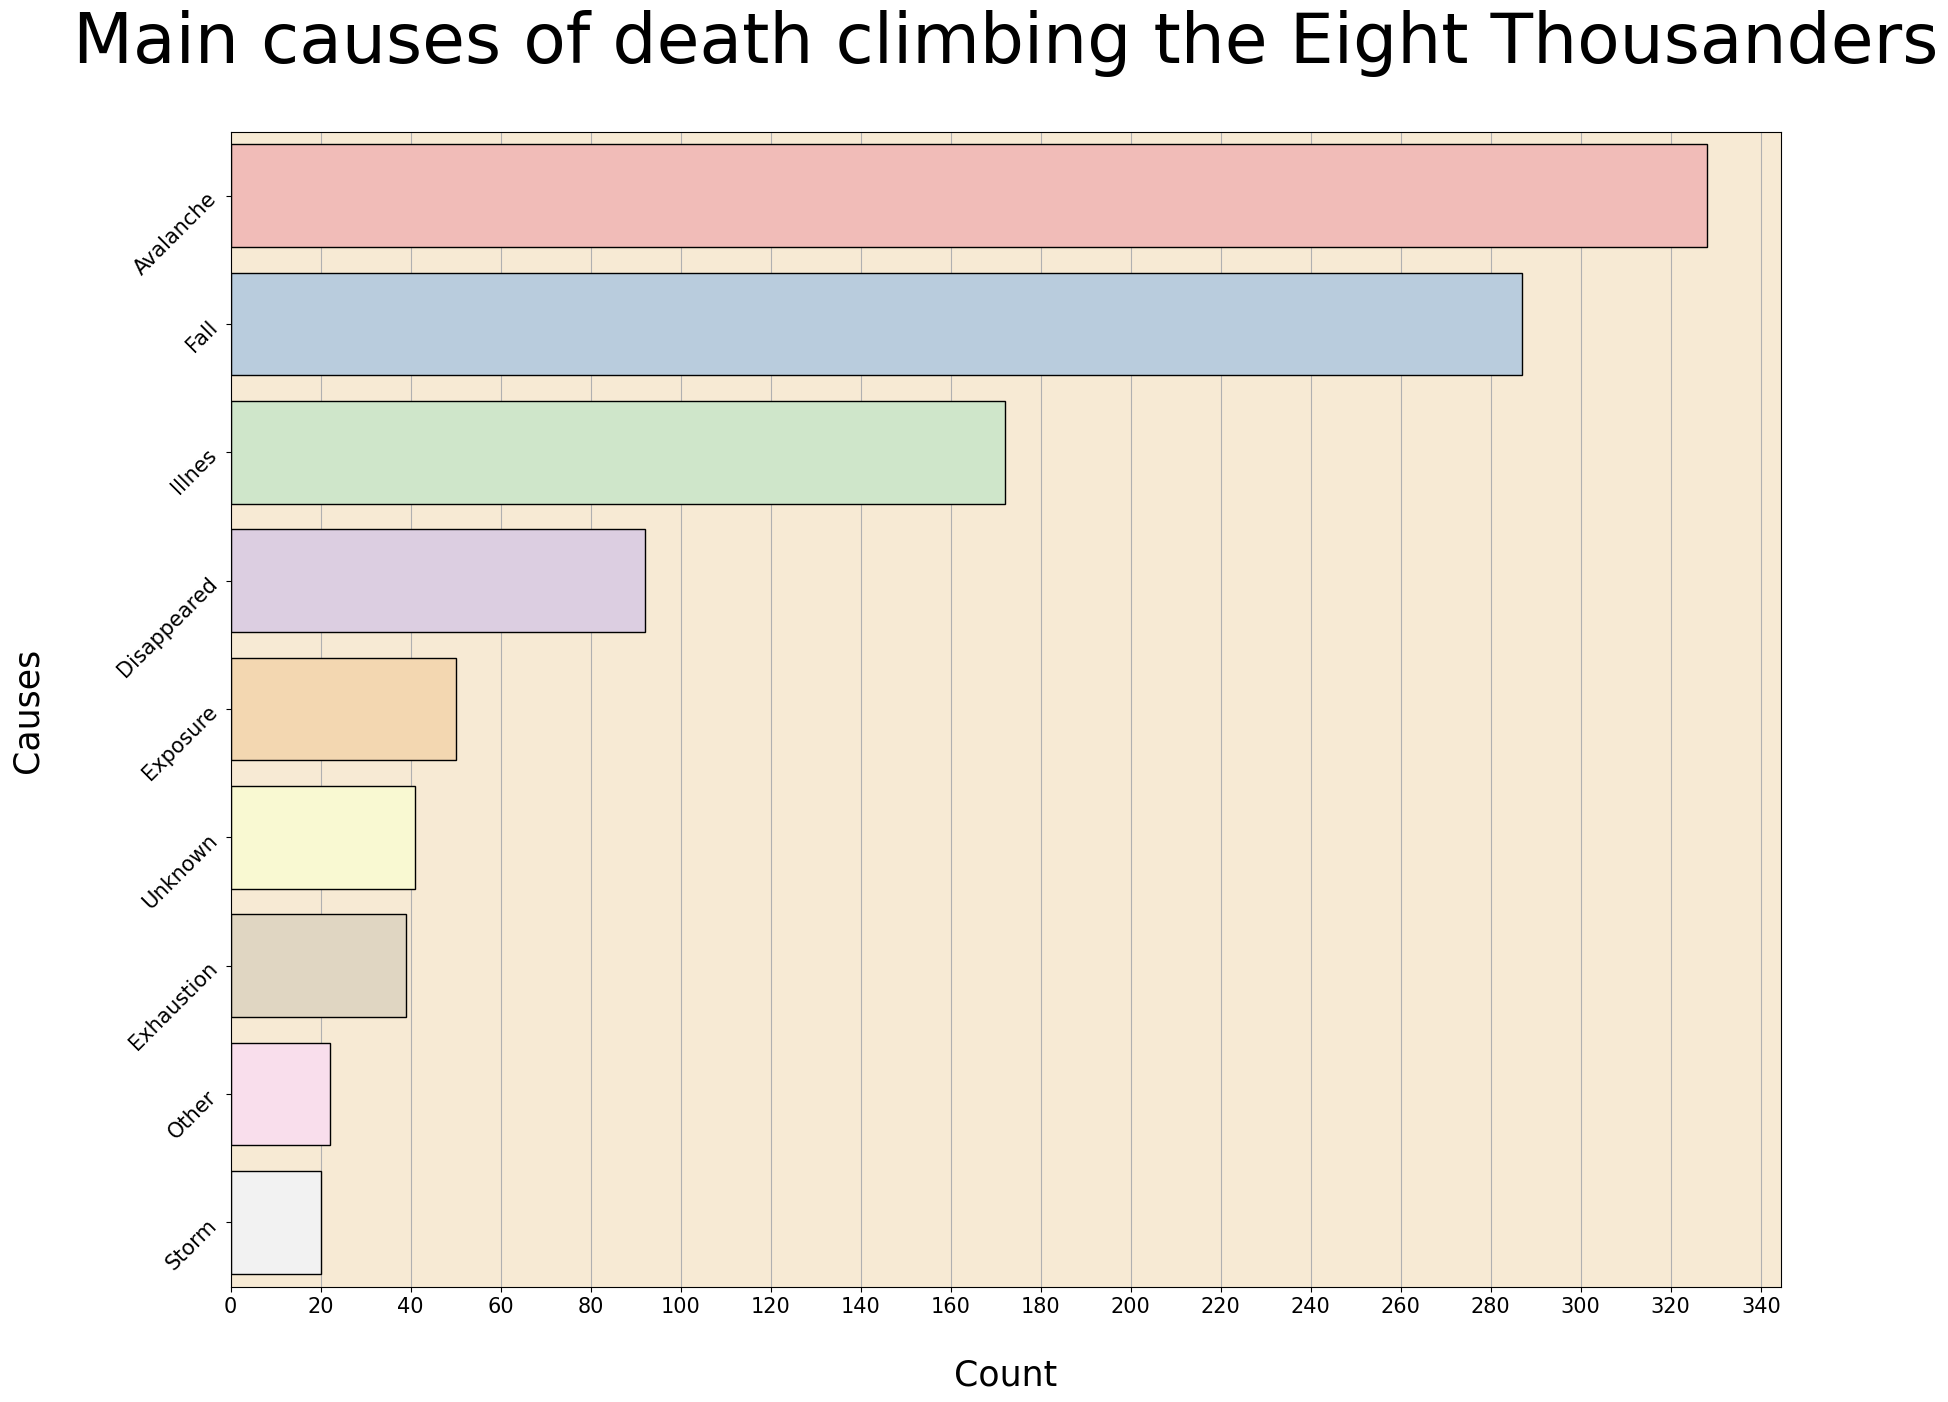

In [17]:
plt.rcParams.update({'axes.grid' : True,
                     'axes.axisbelow' : True})
plt.figure(figsize = (20, 15))
plt.title('Main causes of death climbing the Eight Thousanders', fontsize = 50, pad = 50)

sns.barplot(x = df['Cause'].value_counts(), 
            y = df['Cause'].value_counts().index, 
            palette = 'Pastel1', 
            hue = df['Cause'].value_counts().index, 
            legend = False,
            edgecolor = 'black')
plt.ylabel('Causes', fontsize = 25, labelpad = 50)
plt.yticks(rotation = 45, fontsize = 15)
plt.xlabel('Count', fontsize = 25, labelpad = 30)
plt.xticks(ticks = range(0, 360, 20), fontsize = 15)

plt.show()

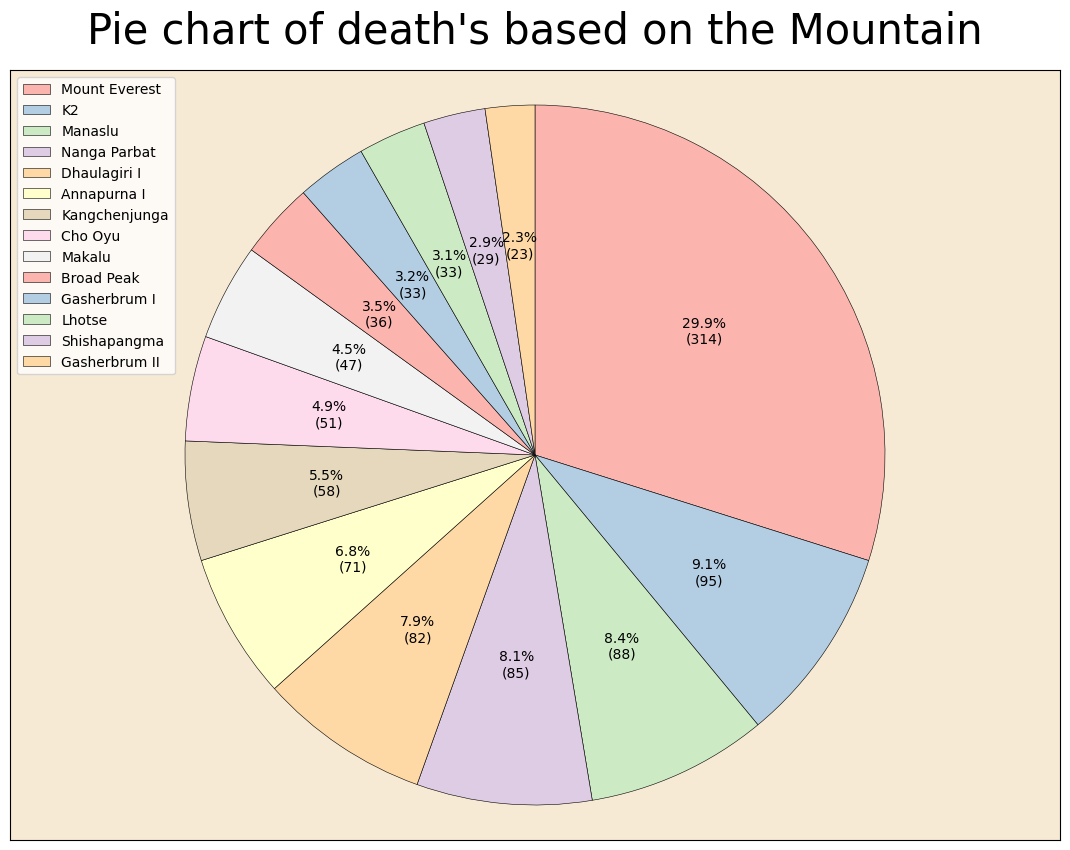

In [18]:
plt.figure(figsize = (15, 10))
plt.title("Pie chart of death's based on the Mountain", fontsize = 30, pad = 20)

plt.pie(x = df['Mountain'].value_counts(), 
        labels = ['']*len(df['Mountain'].value_counts()),
        autopct=lambda pct: f"{pct:.1f}%\n({int(pct/100*len(df))})",
        colors = palette_pastel1,
        wedgeprops = {'edgecolor' : 'black',
                      'linewidth' : 0.4},
        frame = True,
        startangle = 90,
        counterclock = False)
plt.xticks([])
plt.yticks([])
plt.legend(labels = df['Mountain'].value_counts().index,
           loc = 'upper left',
           facecolor = 'white')
plt.xlim(-1.5, 1.5)

plt.show()

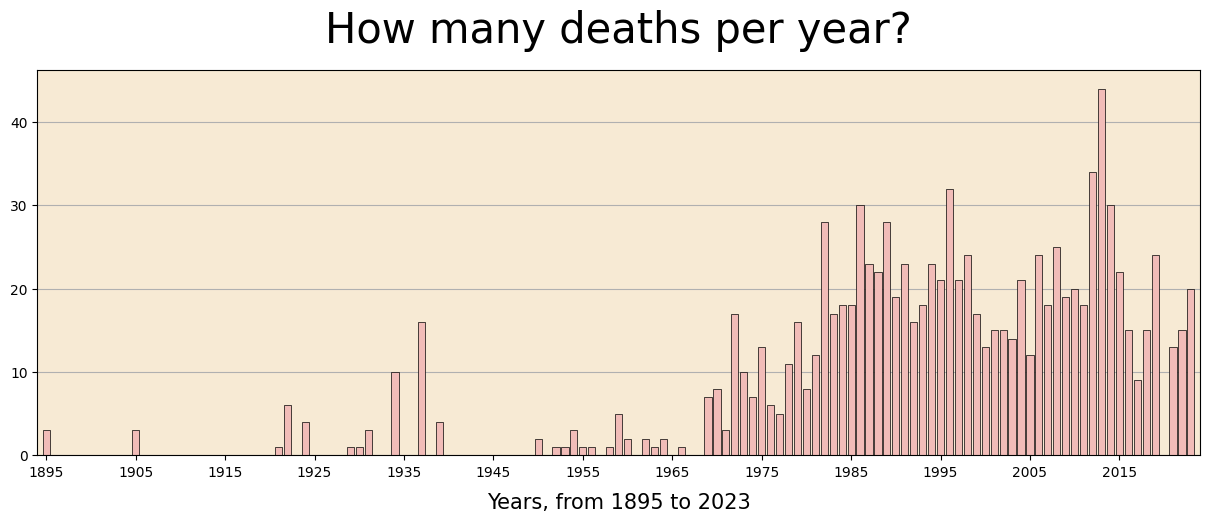

In [19]:
n_deaths_per_year = [len(df[df['Date'].dt.year == element]) for element in range(1895, 2024)]

plt.figure(figsize = (15, 5))
plt.title('How many deaths per year?', fontsize = 30, pad = 20)

sns.barplot(x = np.arange(1895, 2024), 
            y = n_deaths_per_year, 
            color = palette_pastel1[0],
            edgecolor = 'black',
            linewidth = 0.5)
plt.xticks(np.arange(0, 2025-1895, 10), labels = np.arange(1895, 2024, 10))
plt.xlim(-1, 2024-1895)
plt.xlabel('Years, from 1895 to 2023', fontsize = 15, labelpad = 10)

plt.show()

In [20]:
def new_df_mountain(df, mountain):
    '''
    Function for creating a new dataframe for every mountain in the main dataframe
    '''
    mask = df['Mountain'] == mountain
    new_df = df[mask]
    new_df = new_df.drop(columns = 'Mountain')
    return new_df

list_of_df_mountain_names = [('df_' + element).lower().replace(' ', '_') for element in df['Mountain'].unique()]
list_of_mountain_names = list(df['Mountain'].unique())

# dictionary to store DataFrames
mountain_dfs = {}

for element, name in zip(list_of_df_mountain_names, list_of_mountain_names):
    mountain_dfs[element] = new_df_mountain(df, name)

In [21]:
empty_dic = {}
for element, name in zip(mountain_dfs, list_of_mountain_names):
    empty_dic[name] = mountain_dfs[element]['Cause'].value_counts().idxmax()
    
main_causes_by_mountain_df = pd.DataFrame(
    [pd.Series(empty_dic.keys(), name = 'Mountain'),
     pd.Series(empty_dic.values(), name = 'Cause')]
).T

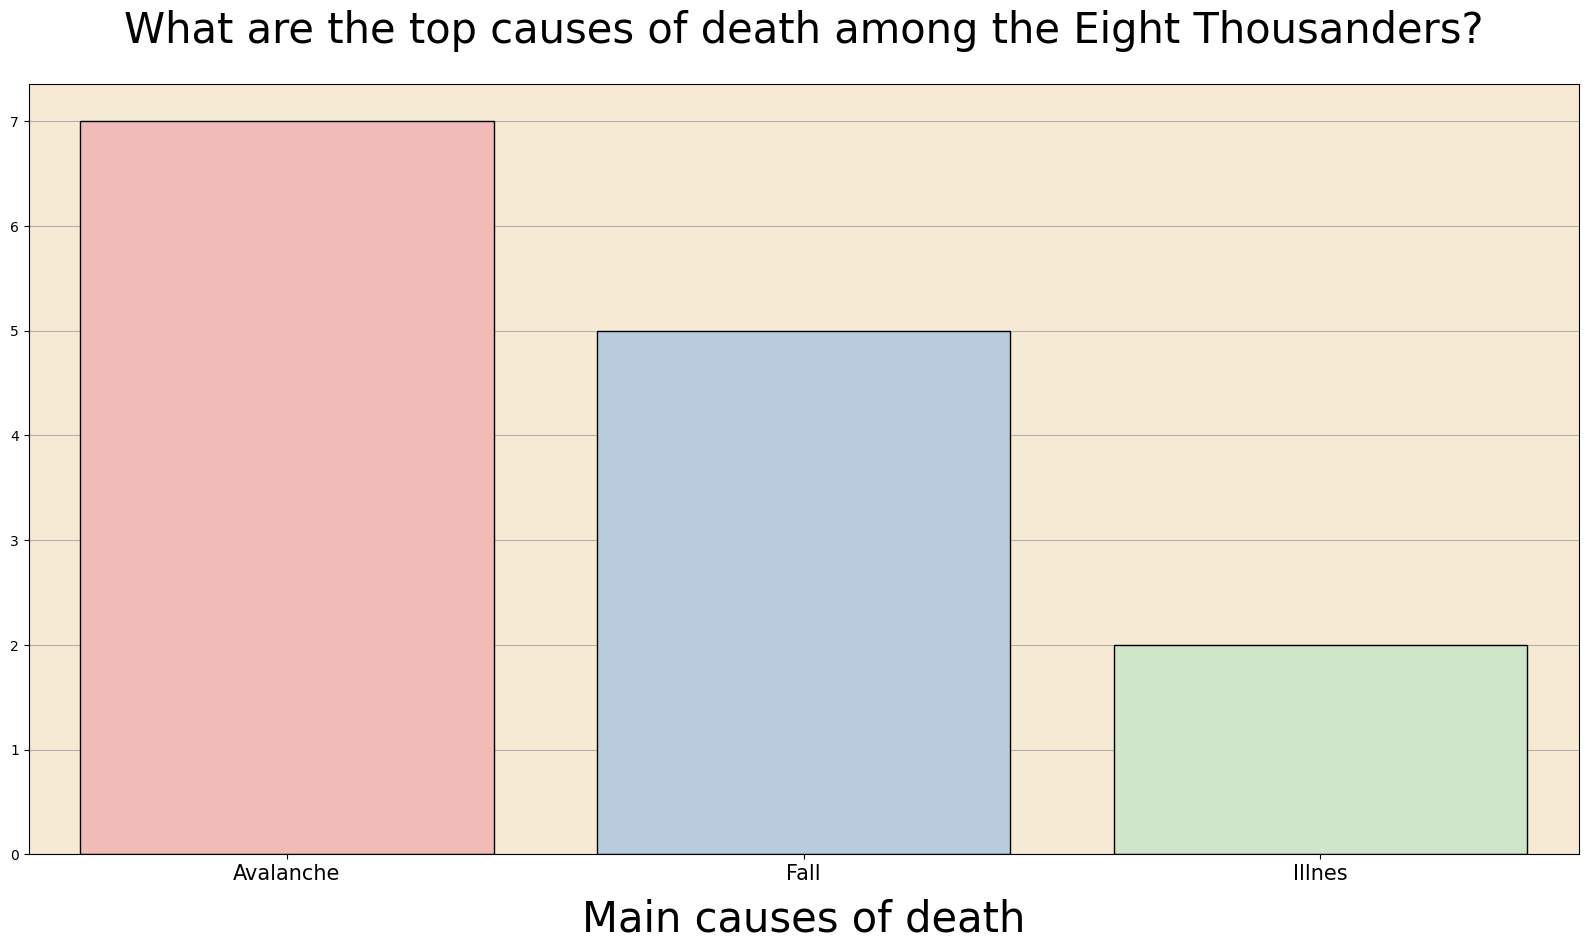

In [22]:
plt.figure(figsize = (20, 10))
plt.title('What are the top causes of death among the Eight Thousanders?', fontsize = 30, pad = 30)

sns.barplot(x = main_causes_by_mountain_df['Cause'].value_counts().index,
            y = main_causes_by_mountain_df['Cause'].value_counts(),
            palette = 'Pastel1',
            edgecolor = 'black')
plt.ylabel('')
plt.xlabel('Main causes of death', fontsize = 30, labelpad = 10)
plt.xticks(fontsize = 15)

plt.show()

In [23]:
country_mapping = {country.name: country.alpha_3 for country in pycountry.countries}
df['iso_a3'] = df['Nationality'].map(country_mapping)
df = df.drop(columns = 'Nationality')

In [24]:
nation_counts = df['iso_a3'].value_counts()

In [25]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [26]:
world = world.merge(nation_counts, on = 'iso_a3', how = 'left')
world = world.drop(159)
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,count
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",16.0
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",50.0
...,...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",1.0
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",NaN
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",NaN


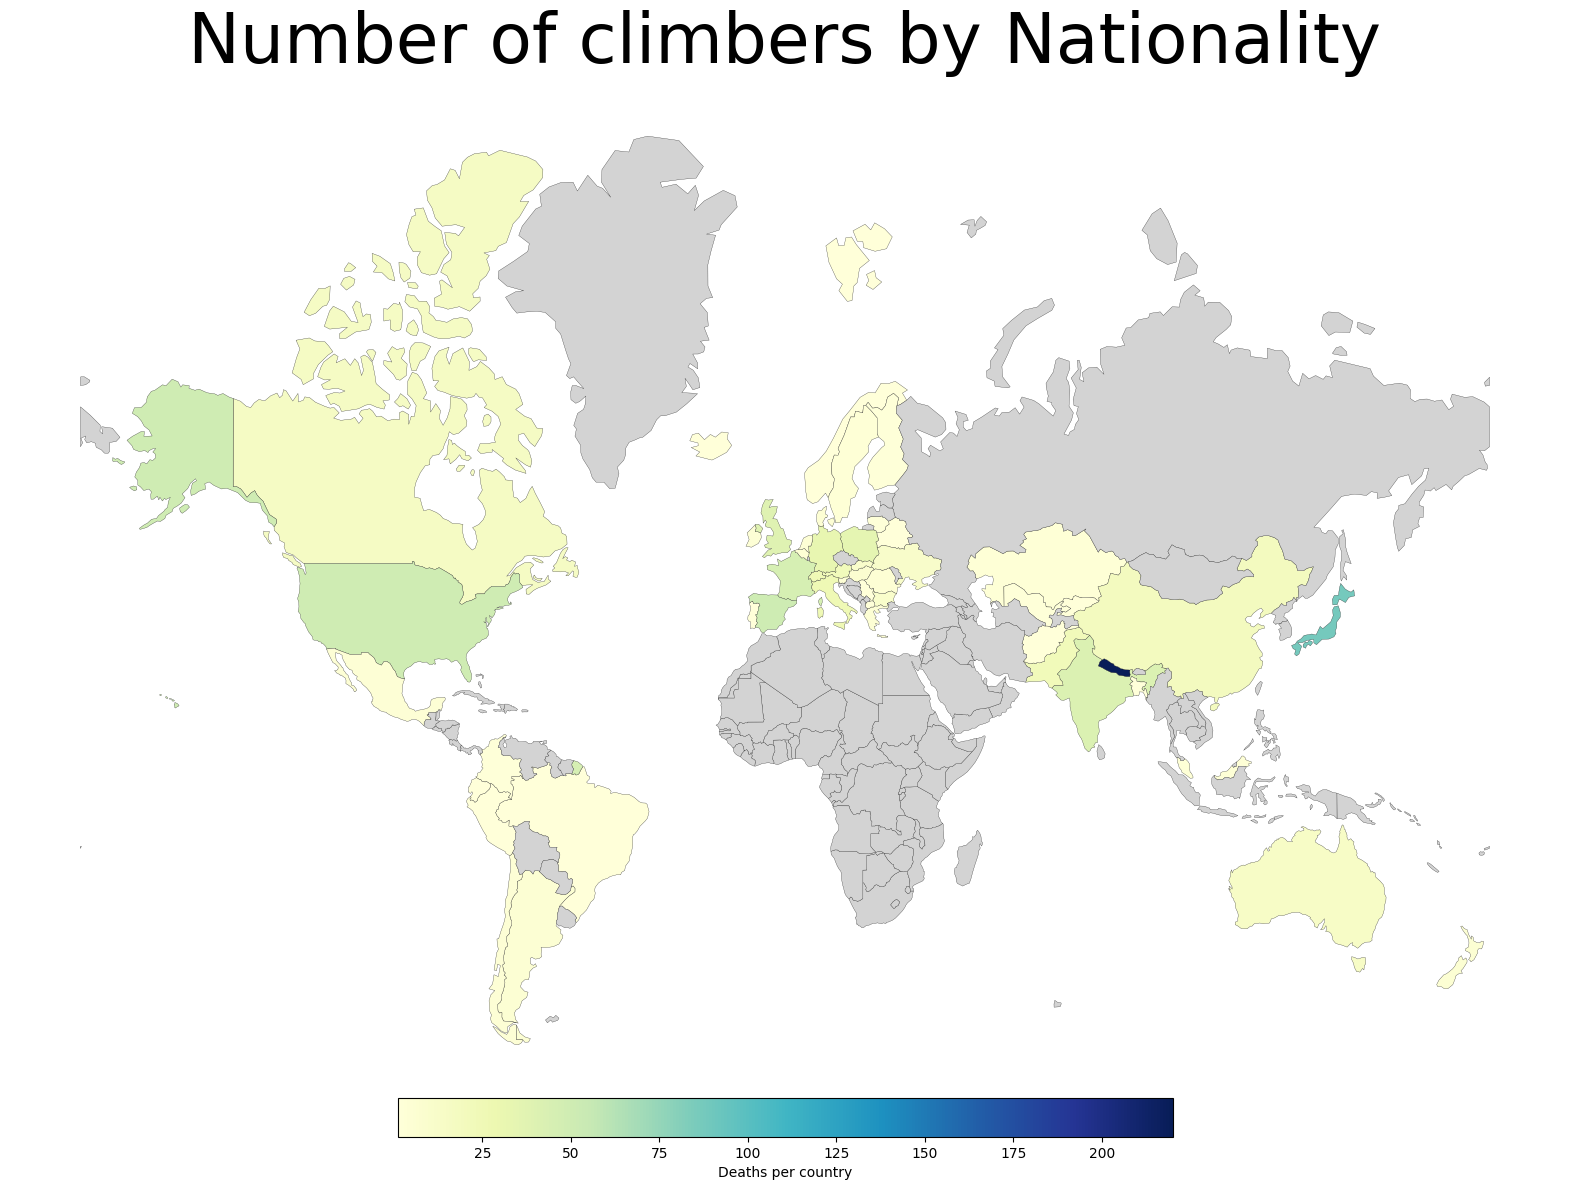

In [27]:
plt.rcParams.update({'axes.grid' : False,
                     'axes.facecolor' : 'white'})

fig, ax = plt.subplots(1, 1, figsize=(20, 20))
ax.set_title('Number of climbers by Nationality', fontsize = 50, pad = 20)

ax = world.to_crs(epsg = 3395).plot(column='count', 
                               legend_kwds = {"label" : "Deaths per country", "orientation" : "horizontal", 'shrink' : 0.5, 'pad' : 0.005},
                               missing_kwds = {"color": "lightgrey", "label": "Missing values"},
                               cmap = 'YlGnBu',
                               linewidth = 0.2, 
                               ax = ax, 
                               edgecolor = '0.1', 
                               legend = True)
ax.axis('off')

plt.show()

In [28]:
asia = gpd.read_file('data\Asia_Russia.shp')

In [29]:
Latitude_list = [27.986065, 35.880981, 28.549444, 35.237499, 28.697710, 28.596111, 27.702414, 28.094168, 27.886829786, 35.811668, 35.72416667, 27.956996172, 28.352222, 35.758331]
Longitude_list = [86.922623, 76.508102, 84.561943, 74.589165, 83.486145, 83.820274, 88.147881, 86.660835,  87.086499654, 76.565002, 76.69666667, 86.9333296, 85.779724, 76.653336]
points_data = {
    'Mountain' : df['Mountain'].value_counts().index,
    'Coordinates' : [Point(x, y) for x, y in zip(Longitude_list, Latitude_list)]
}
gdf_8thousanders = gpd.GeoDataFrame(points_data, crs = asia.crs, geometry = 'Coordinates')
gdf_8thousanders.set_index('Mountain', inplace = True)

In [30]:
asia['is_nepal'] = asia['NAME'] == 'NEPAL'
asia['is_nepal'].replace(False, np.nan, inplace = True)
asia['is_nepal'].replace(True, 'Nepal', inplace = True)

In [31]:
asia.head()

,NAME,CC,REGION,iso_alpha2,iso_alpha3,iso_num,tld,geometry,is_nepal
0,AFGHANISTAN,AF,ASIA,AF,AFG,4.0,.af,"POLYGON ((71.00445 38.47521, 71.00534 38.47454...",NaN
1,BANGLADESH,BG,ASIA,BD,BGD,50.0,.bd,"POLYGON ((92.32581 20.63786, 92.32667 20.63706...",NaN
2,BANGLADESH,BG,ASIA,BD,BGD,50.0,.bd,"POLYGON ((92.28375 20.90914, 92.28161 20.90792...",NaN
3,BANGLADESH,BG,ASIA,BD,BGD,50.0,.bd,"POLYGON ((91.97830 21.47292, 91.97578 21.47289...",NaN
4,BANGLADESH,BG,ASIA,BD,BGD,50.0,.bd,"POLYGON ((91.91456 21.48164, 91.91164 21.47956...",NaN


In [32]:
def annotation(gdf, mountain_name, x_offset, y_offset):
    x, y = gdf_8thousanders.loc[mountain_name].Coordinates.x, gdf_8thousanders.loc[mountain_name].Coordinates.y
    ax.annotate(mountain_name, 
                (x, y), 
                xytext = (x-x_offset, y-y_offset), 
                textcoords = "offset points", 
                fontsize = 10, 
                ha = 'left', 
                va = 'bottom', 
                arrowprops = dict(arrowstyle="<-", connectionstyle="arc3, rad=0"))

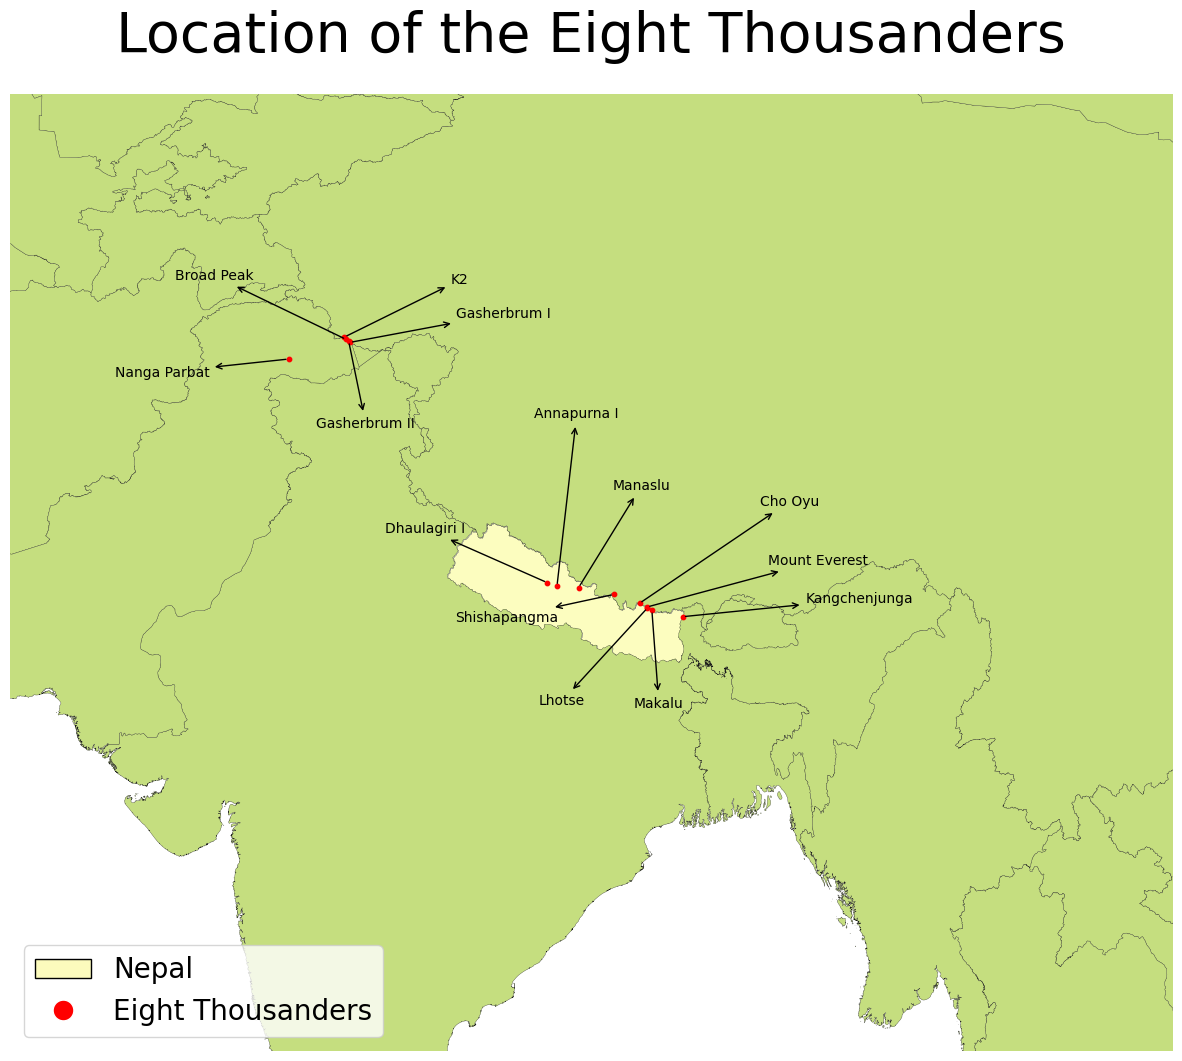

In [46]:
cmap = matplotlib.colormaps.get_cmap('magma_r')
magma_palette_1 = cmap(1)

fig, ax = plt.subplots(1, 1, figsize = (15, 15))
plt.title('Location of the Eight Thousanders', fontsize = 40, pad = 30)
ax.set_xlim(65, 105)
ax.set_ylim(15, 43)
ax.axis('off')
magma_patch = mpatches.Patch(facecolor = magma_palette_1, edgecolor = 'black')
red_dot = plt.Line2D([], [], color = 'white', marker = 'o', markerfacecolor = 'red', markersize = 15)

asia.plot(ax = ax,
          edgecolor = '0.1',
          linewidth = 0.2,
          column = 'is_nepal',
          missing_kwds = {"color": "#c5de7f"},
          legend = True,
          cmap = 'magma_r')
ax.legend(handles = [magma_patch, red_dot], 
          labels = ['Nepal', 'Eight Thousanders'], 
          loc = 'lower left', 
          fontsize = 20)

gdf_8thousanders.plot(color = 'red', 
                      ax = ax, 
                      markersize = 10)
for element in ['Mount Everest', 'K2']:
    annotation(gdf_8thousanders, element, 0, 0)
for element in ['Dhaulagiri I', 'Broad Peak']:
    annotation(gdf_8thousanders, element, 200, -5)
for element in ['Makalu', 'Gasherbrum II']:
    annotation(gdf_8thousanders, element, 100, 100)
for element in ['Gasherbrum I', 'Kangchenjunga']:
    annotation(gdf_8thousanders, element, 0, 20)
annotation(gdf_8thousanders, 'Lhotse', 165, 100)
for element in ['Shishapangma', 'Nanga Parbat']: 
    annotation(gdf_8thousanders, element, 200, 50)
annotation(gdf_8thousanders, 'Annapurna I', 100, -90)
annotation(gdf_8thousanders, 'Cho Oyu', 0, -40)
annotation(gdf_8thousanders, 'Manaslu', 60, -40)

plt.show()